In [ ]:
# 0. เขียนโปรแกรมหาค่าสูงสุด
#    ในลิสต์
# 1. เขียน 8 puzzle 
# 2. เขียน depth-first search 
#     พร้อม อะนิเมชั่น
# 3. เลือกข้อมูล 1 อย่างจาก 
#     Kaggle มาทำการ visualize
#     ข้อมูลในรูปแบบกราฟต่างๆ

In [17]:
# 0. เขียนโปรแกรมหาค่าสูงสุด
#    ในลิสต์

max_list = [23,54,78,66,32,44,90]


def find_max_number(the_list):
    return max(the_list)

find_max_number(max_list)

90

In [9]:
### Start & End Matrix - for 8 puzzle

start = [[1,2,3],
         [8,0,4],
         [7,6,5]]

end = [[2,8,1],
       [0,4,3],
       [7,6,5]]


print(start)
print(end)

[[1, 2, 3], [8, 0, 4], [7, 6, 5]]
[[2, 8, 1], [0, 4, 3], [7, 6, 5]]


In [ ]:
### 8 Puzzle

class Node:
    def __init__(self,data,level,fval):
        """ Initialize the node with the data, level of the node and the calculated fvalue """
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        """ Generate child nodes from the given node by moving the blank space
            either in the four directions {up,down,left,right} """
        x,y = self.find(self.data,'_')
        """ val_list contains position values for moving the blank space in either of
            the 4 directions [up,down,left,right] respectively. """
        val_list = [[x,y-1],[x,y+1],[x-1,y],[x+1,y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data,x,y,i[0],i[1])
            if child is not None:
                child_node = Node(child,self.level+1,0)
                children.append(child_node)
        return children
        
    def shuffle(self,puz,x1,y1,x2,y2):
        """ Move the blank space in the given direction and if the position value are out
            of limits the return None """
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None
            

    def copy(self,root):
        """ Copy function to create a similar matrix of the given node"""
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp    
            
    def find(self,puz,x):
        """ Specifically used to find the position of the blank space """
        for i in range(0,len(self.data)):
            for j in range(0,len(self.data)):
                if puz[i][j] == x:
                    return i,j


class Puzzle:
    def __init__(self,size):
        """ Initialize the puzzle size by the specified size,open and closed lists to empty """
        self.n = size
        self.open = []
        self.closed = []

    def accept(self):
        """ Accepts the puzzle from the user """
        puz = []
        for i in range(0,self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self,start,goal):
        """ Heuristic Function to calculate hueristic value f(x) = h(x) + g(x) """
        return self.h(start.data,goal)+start.level

    def h(self,start,goal):
        """ Calculates the different between the given puzzles """
        temp = 0
        for i in range(0,self.n):
            for j in range(0,self.n):
                if start[i][j] != goal[i][j] and start[i][j] != '_':
                    temp += 1
        return temp
        

    def process(self):
        """ Accept Start and Goal Puzzle state"""
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")        
        goal = self.accept()

        start = Node(start,0,0)
        start.fval = self.f(start,goal)
        """ Put the start node in the open list"""
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j,end=" ")
                print("")
            """ If the difference between current and goal node is 0 we have reached the goal node"""
            if(self.h(cur.data,goal) == 0):
                break
            for i in cur.generate_child():
                i.fval = self.f(i,goal)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            """ sort the opne list based on f value """
            self.open.sort(key = lambda x:x.fval,reverse=False)


puz = Puzzle(3)
puz.process()

In [6]:
# Adjacency List (dictionary)

adj_list = {"A": ["B", "C"],
          "B": ["C"],
          "C": ["D"]}

adj_list

{'A': ['B', 'C'], 'B': ['C'], 'C': ['D']}

In [28]:
# Adjacency List 2 (dictionary)

adj_list2 = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

adj_list2


{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}

In [16]:
# Adjacency List 3 (list)

vertex_list = ['0', '1', '2', '3', '4', '5', '6']

edge_list = [(0,1), (0,2), (1,0), (1,3), (2,0),
             (2,4), (2,5), (3,1), (4,2), (4,6), 
             (5,2), (6,4)]



    
#adj_list3

graphs = (vertex_list, edge_list)
#print(graphs)

def dfs(graph, start):
    vertex_list, edge_list = graph
    visited_vertex = []
    stack = [start]
    adj_list3 = [[] for vertex in vertex_list]
    
    for edge in edge_list:
        adj_list3[edge[0]].append(edge[1])
        
    while stack:
        current = stack.pop()
        for neighbor in adj_list3[current]:
            if not neighbor in visited_vertex:
                stack.append(neighbor)
        visited_vertex.append(current)
    return visited_vertex

dfs(graphs, 0)



[0, 2, 5, 4, 6, 1, 3]

In [ ]:
# Depth First Search (recursive, for dictionary)

visited = [] # Empty list to keep track of visited nodes.

# if unvisited, mark as visited and repeat for adjacent nodes
# repeat for all nodes
# source is "A"

def dfs(visited, graph, node):
    if node not in visited:
        print(node)
        visited.append(node)
        # for the adjacent nodes
        for adjacent in graph[node]:
            # invoke function again
            dfs(visited, graph, adjacent)

# call function on adj_list2 (graph)
dfs(visited, adj_list2, 'A')



#adj_list2['A']

In [10]:
# 2. เขียน depth-first search 
# Depth first search for adj_list

def dfs_non_recursive(graph, source):

       if source is None or source not in graph:

           return "Invalid input"

       path = []

       stack = [source]

       while(len(stack) != 0):

           s = stack.pop()

           if s not in path:

               path.append(s)

           if s not in graph:

               #leaf node
               continue

           for neighbor in graph[s]:

               stack.append(neighbor)

       return " ".join(path)


dfs_non_recursive(adj_list2, 'A')


'A C F B E D'

In [21]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

flights = pd.read_csv('flights.csv')
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


Text(0, 0.5, 'Arrival Delay (in minutes)')

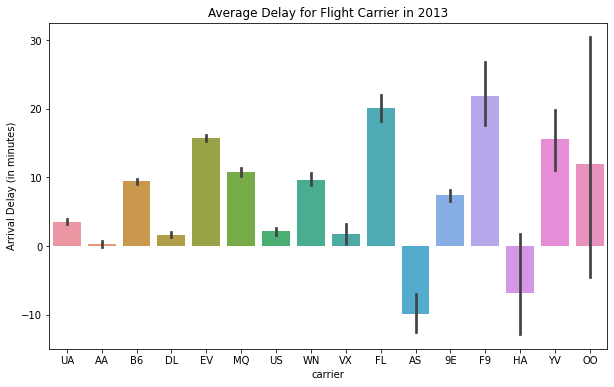

In [24]:
# set width and height of the figure
plt.figure(figsize=(10,6))

plt.title("Average Delay for Flight Carrier in 2013")

sns.barplot(x=flights['carrier'], y=flights['arr_delay'])

plt.ylabel("Arrival Delay (in minutes)")

In [25]:
# import another dataset, wrangled for heat map visualization

heat_flight = pd.read_csv('heat_flight.csv')
heat_flight.head()

,month,UA,B6,EV,DL,AA,MQ,US,9E,WN,VX,FL,YV,AS,F9,HA,OO
0,1,4637,4427,4171,3690,2794,2271,1602,1573,996,316,328,46,62,59,31,1.0
1,2,4346,4103,3827,3444,2517,2044,1552,1459,911,271,296,48,56,49,28,NaN
2,3,4971,4772,4726,4189,2787,2256,1721,1627,998,303,316,18,62,57,31,NaN
3,4,5047,4517,4561,4092,2722,2211,1727,1511,980,466,311,38,60,57,30,NaN
4,5,4960,4576,4817,4082,2803,2284,1785,1462,1006,496,325,49,62,58,31,NaN


Text(0.5, 42.0, 'Airline')

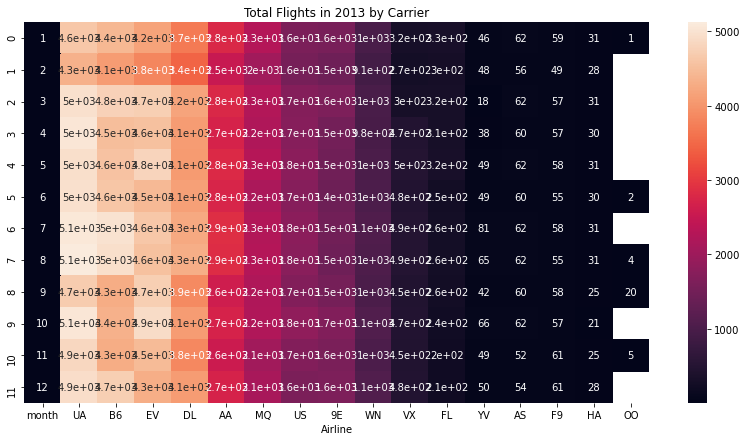

In [27]:
# set width and height of the figure
plt.figure(figsize=(14,7))

# add title
plt.title("Total Flights in 2013 by Carrier")

# heatmap
sns.heatmap(data=heat_flight, annot=True)

plt.xlabel("Airline")